<a href="https://colab.research.google.com/github/bibekebib/Pytorch-Tutorials-Code-Base/blob/main/Learning_Pytorch_fundamental_Neural_Network_Structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

first Lets import all the requirements that is needed for building the basic architecture of Neural Network in pytorch. If you havent yet installed pytorch, i strongly suggest you to install it cause i wont be teaching it in details but i will tell in short brief about installing it. 

Plus, we won't talking much about pytorch fundamentals, like tensors and other operations, but if you want it, I will make separate video on that. But in this series, I assume you are pretty familiar with basic pytorch , numpy and python and we will continue with that assumptions. So much to cover, lets see how far we can go on this.

The first task is to import the libraries we need for the overall task, pytorch is the must at first and if you need something else in the future, we will import requirements in subsequent cells.

In [ ]:
# importing libraries

In [ ]:
import torch

 i have take a toy dataset for less complications, but for now lets stick with this one. 

In [ ]:



x  = [[1,2],[3,4],[5,6],[7,8]]
y = [ [3],[7],[11],[15]]



the next task is to convert it into tensor which is the building block of pytorch library, its like numpy ndarray, but not exactly the same. 

In [ ]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()


Like i mentioned above, tensor and numpy ndarray are same, but different, the difference can be seen when it comes to execution. Pytorch tensors can be executed in GPU whil numpy array doesnt support execution in cpu, plus because of threading, it takes less time for pytorch tensors to execute even in cpu to numpy array. So, if we have GPU available, we will be using it in full extend. 


Its difficult to afford GPU by us, so we will be using Free GOOGLE COLAB and enable GPU there. 

In [ ]:

from torch.cuda import is_available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

cuda


In [ ]:
X = x.to(device)
Y = y.to(device)

Now, we are into the basis foundation of Neural Network. Lets learn each step, with explanation of each step.

In [ ]:
import torch.nn as nn 
# torch.nn is the class where everything about neural network resides. 

In [ ]:
class Nnet(nn.Module):
  #inheriting the class torch.nn.Module into Nnet It is compulsory to inherit from nn.Module
  # as it is the base class for all NN.
  def __init__(self): #making all the initializations of all components nn.Module
    super().__init__()
    # super()__init__() make sure that the class completely inherit nn.Module
    #with this, we can completely take advantage of pre-built functionlaties of nn.Module


    #define Layers in the Neural Network

    self.input_to_hidden_layer = nn.Linear(2,8)
    self.hidden_layer_activation = nn.ReLU()
    self.hidden_to_output = nn.Linear(8,1)


    #defining Forward Propgation

  def forward (self, x):
      x = self.input_to_hidden_layer(x)
      x = self.hidden_layer_activation(x)
      x = self.hidden_to_output(x)
      return x


here we are defining 3 layers, input layer, hidden layer and output layer, with activation in the hidden layer.

 If we look closely, we can see we have used nn.Linear(2,8) and nn.Linear(8,1) it means, the first parameter is the number of input features to the node and the second is the number of output features from the node. This means, as in our dataset, we will be sending 2 features into the node and it will output 8 output features in the hidden layer. 

 The hidden layer also comes up with activaion layers, in brief the activation layers makes sure either to fire or not to the node. 
 
 Here, we have used ReLU activation function, which stands for Rectified Linear Unit, 
 The other popular activation function are 
 * sigmoid 
 * Softmax 
 * Tanh

The forward function is for defining forward propogation, the name "FORWARD" is compulosry as it is reserved word to define forward propagation. With other name, it would create error. 

Lets create an instance of NNet class as mynet.

Also, we will look how the randomly initialized weights would look like.

In [ ]:
mynet = Nnet().to(device)
# taking everything to the device is compulory if we want to utilize GPU.


In [ ]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.1340,  0.0216],
        [-0.4780, -0.1956],
        [ 0.1034, -0.6665],
        [-0.4339, -0.5307],
        [ 0.3050,  0.2852],
        [ 0.3521, -0.0852],
        [ 0.5753, -0.2291],
        [-0.2018,  0.5652]], requires_grad=True)

Note, everytime you run the above code, the weights initialized will be different, if you want to have same, you have to specify the seed using manual seed method in torch as torch.manual_seed(42).

Now, lets define the loss function for our model. We will be using mean square loss in our case, the other available prominent loss functions can be
* CrossEntropyLoss (for multinomial classifications)
* BCELoss (Binary cross entropy loss for binary classification)

But more on these in upcming tutorials. 

In [ ]:
loss_func = nn.MSELoss()

model_output = mynet(X)
loss_value = loss_func(model_output, Y)
print(loss_value)

tensor(78.7674, grad_fn=<MseLossBackward0>)


In pytorch, for loss function, the first parameter is the predicted output and the second parameter is the actual output required.

Now, its time to optimize the model using optimizer that tries to reduce the loss value. 
The inputs to the optimizer will be weights, biases and learning rate when updating the weights. 

Here, we will be employing Stochastic gradient descent (SGD), other optimizers will be used for other use cases.


In [ ]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr=0.001)


Now we need to perform the following steps in a single epoch together and run all the steps for number of loops.

* Calulate loss values correponging to given input and output
* calculate the gradient correponding to each parameter
* update the weights based on learning rate and gardient
* flush out previous epochs gardient

In [ ]:
loss_history = []
for _ in range(50):
  opt.zero_grad() # flush out previous epochs gradients
  loss_value = loss_func(mynet(X), Y) #calculating loss value
  loss_value.backward() #performing back propagation
  opt.step() #update weights according to the gradients calculated
  loss_history.append(loss_value.cpu().detach().numpy()) 
  #The last step to convert all the tensors in GPU to cpu and then to numpy since numpy doesnt support GPU.
  

Lets plot out result.

Text(0, 0.5, 'loss value')

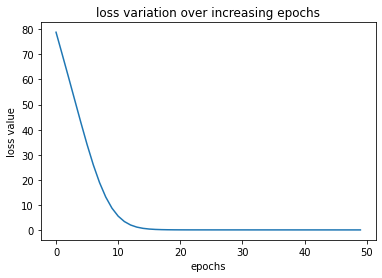

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

# Saving and loading the pytorch model
 

In [ ]:
#saving model
torch.save(mynet.state_dict(), 'mymodel.pth')


In [ ]:
#loading model
mynet.load_state_dict(torch.load('mymodel.pth'))

<All keys matched successfully>